In [1]:
%load_ext autoreload
%autoreload 2
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
from config.settings import *

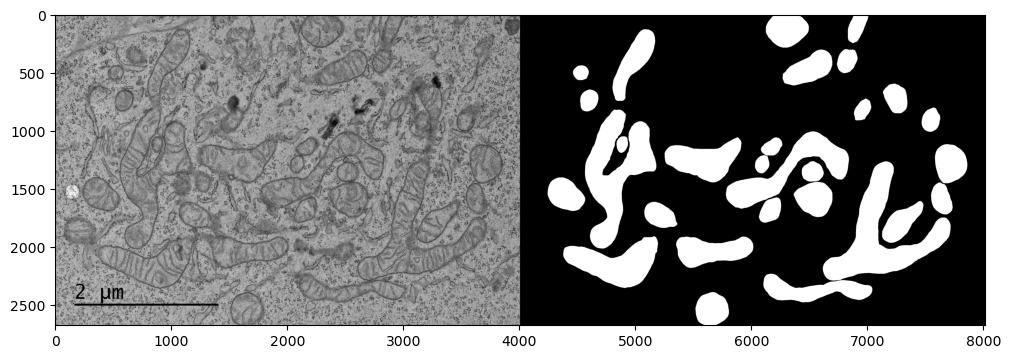

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from src.data.loaders import MitoSemsegDataset

dataset = MitoSemsegDataset(root=TRAIN_ROOT)
img, mask = dataset[81]

plt.figure(figsize=(12,6));
plt.imshow(np.concatenate([img, 255*mask], axis=1), cmap='gray');

In [10]:
from src.data.loaders import get_mean_and_std
mean, std = get_mean_and_std()
mean, std

(0.6551765203475952, 0.15311908721923828)

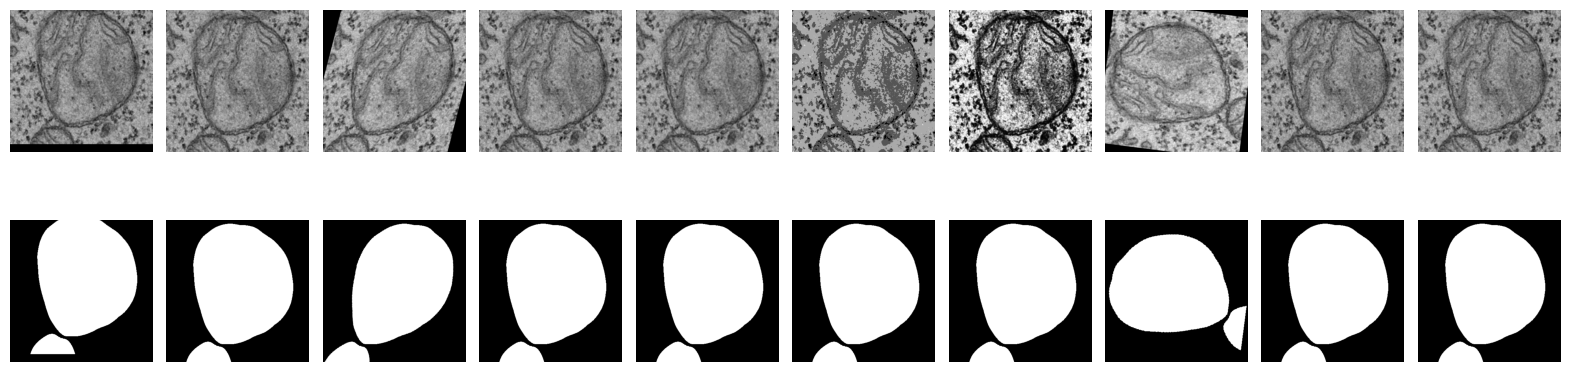

In [27]:
from src.data.loaders import TrivialAugmentWide, ToTensor, Compose

top, left, h, w = 1100, 3500, 400, 400
crop = img[top:top+h,left:left+w]
crop_mask = mask[top:top+h,left:left+w]

transforms = Compose([ToTensor(), TrivialAugmentWide()])

m, n = 2, 10
augs = []
for _ in range(n):
    augs.append(transforms(crop, crop_mask))

fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(m, n, wspace=.1)
ax = gs.subplots()
for i in range(n):
    ax[0,i].axis('off'), ax[1,i].axis('off')
    ax[0,i].imshow(augs[i][0].squeeze(), cmap='gray')
    ax[1,i].imshow(augs[i][1].squeeze(), cmap='gray')